In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
import sklearn.datasets
import sklearn.linear_model
import matplotlib

In [2]:
def plot_decision_boundary(X, y, pred_func):
    # Find the boundaries of the plot and give it some margin
    margin = 0.5
    x_min = X[:, 0].min() - margin
    x_max = X[:, 0].max() + margin
    y_min = X[:, 1].min() - margin
    y_max = X[:, 1].max() + margin
    step = 0.01
    # Generate a grid of points with some step size
    xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))    
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)


## Moons dataset

X.shape: (200, 2)
y.shape: (200,)


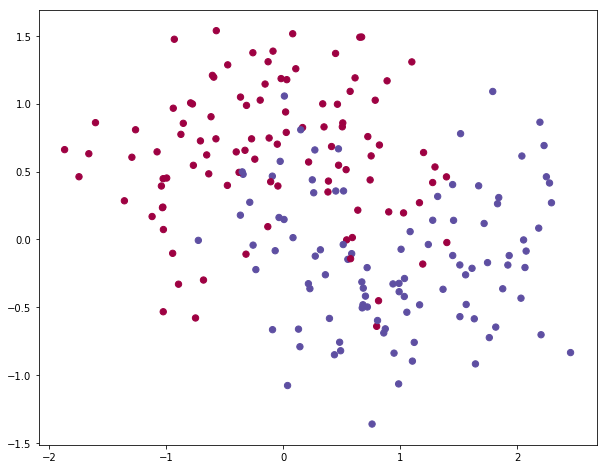

In [37]:
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

# Generate a dataset and plot it
np.random.seed(100)
X_train, y_train = sklearn.datasets.make_moons(200, noise=0.4)

print('X.shape:', X_train.shape)
print('y.shape:', y_train.shape)

plt.scatter(X_train[:,0], X_train[:,1], s=40, c=y_train, cmap=plt.cm.Spectral)
plt.show()

## Train a classifier

In [38]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD, RMSprop
from keras.utils import np_utils
from keras.regularizers import l2

model = Sequential()
model.add(Dense(1024, activation="relu", kernel_initializer="normal", input_dim=2))
model.add(Dense(1, activation="sigmoid", kernel_initializer="normal"))
sgd = SGD(lr = 0.1, momentum = 0.9, nesterov = True)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

model.fit(X_train, 
          y_train, 
          batch_size=8, 
          epochs=1000, 
          verbose=0)

scores = model.evaluate(X_train, y_train, verbose=0)

for name, score in zip(model.metrics_names, scores):
    print('%s: %f' % (name, score))

loss: 0.233274
acc: 0.895000


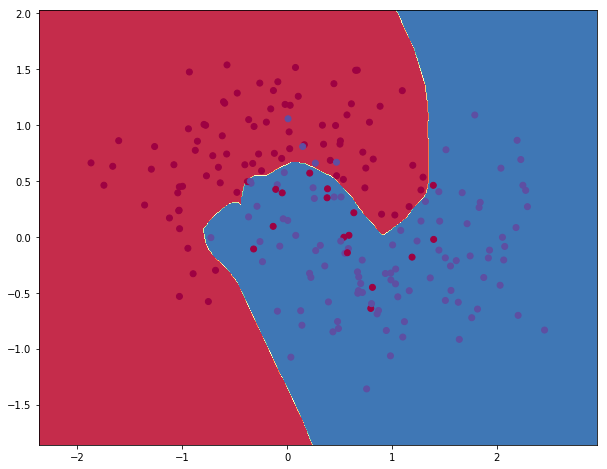

In [39]:
plot_decision_boundary(X_train, y_train, model.predict_classes)